# Simple Linear Regression
*   In this lab we will use simple linear regression to predict the car price.
*   Objective
    - To know if the dealer is offering fair value for my trade-in.
    - To know if I put a fair value on my car

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df=pd.read_csv('automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [5]:
X= df.drop('price',axis=1) #independent variable
Y= df['price'] #dependent variable

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state=1)

In [7]:
X_train_simple=X_train['highway-mpg'].values.reshape(-1,1)
X_test_simple=X_test['highway-mpg'].values.reshape(-1,1)

In [8]:
simple_lm=LinearRegression()
simple_lm.fit(X_train_simple,y_train)

LinearRegression()

In [9]:
y_hat_simple=simple_lm.predict(X_test_simple)
y_hat_simple[:5]

array([10530.19044542,  7150.17926639, 12220.19603494, 10530.19044542,
       13910.20162445])

In [10]:
Y[:5]

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [11]:
y_hat_simple.shape

(41,)

In [12]:
simple_lm.intercept_

39260.28546717645

In [13]:
simple_lm.coef_.item()

-845.0027947574558

In [14]:
X_train_simple=X_train['horsepower'].values.reshape(-1,1)
X_test_simple=X_test['horsepower'].values.reshape(-1,1)

In [15]:
simple_lm=LinearRegression()
simple_lm.fit(X_train_simple,y_train)

LinearRegression()

In [16]:
y_hat_simple=simple_lm.predict(X_test_simple)
y_hat_simple[:5]

array([12166.10030237,  7173.74640389,  9928.14855478,  8550.94747933,
       15436.95285656])

In [17]:
simple_lm.intercept_

-4532.462737395461

In [18]:
simple_lm.coef_

array([172.15013443])

In [19]:
SS_R=np.sum(((y_test-y_hat_simple)**2))

In [20]:
SS_R

934413874.680998

In [21]:
y_mean=np.mean(y_test)

In [22]:
SS_T=np.sum(((y_test - y_mean)**2))
SS_T

2172827835.1219516

In [23]:
R_sq= 1-SS_R/SS_T

In [24]:
R_sq

0.5699549409405678

In [25]:
# x_train,x_test , y_train, y_test = train_test_split(X,Y, random_state=1,test_size=0.3)


In [26]:
# x_test_simple=x_test['engine-size'].values.reshape(-1,1)
# x_train_simple=x_train['engine-size'].values.reshape(-1,1)

In [27]:
# x_train_simple.shape
y_train.shape

(160,)

In [28]:
# simple_lr=LinearRegression()
# simple_lr.fit(x_train_simple,y_train) 

# Multiple Linear Regression
-   As seen in Simple Linear Regression, we used single independent variable for car price prediction.
-   However, in real world datasets, for accurate prediction of car price, we need to consider multiple features/ variables instead of single one. In such scenario Multiple Linear Regression would be helpful.

__ Predict car price using variables [horsepower, curb-weight, engine-size, highway-mpg]

In [29]:
to_select = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']

X_train_mult = X_train[to_select].values
X_test_mult= X_test[to_select].values

In [30]:
mult_lm=LinearRegression()
mult_lm.fit(X_train_mult,y_train)

LinearRegression()

In [31]:
y_hat_multi=mult_lm.predict(X_test_mult)
y_hat_multi[:5]

array([11457.56050541,  5966.17033563, 11313.13362185,  6839.1134896 ,
       15765.36249767])

In [43]:
Y[:5]

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [32]:
y_hat_multi.shape

(41,)

In [33]:
mult_lm.intercept_

-11539.108515802094

In [34]:
mult_lm.coef_

array([ 54.23019834,   3.1154028 ,  93.34038826, -18.71070774])

In [35]:
SS_R_multi=np.sum(((y_test-y_hat_multi)**2))

SS_T=np.sum(((y_test - y_mean)**2))
R_sq_multi=1- SS_R_multi/SS_T

R_sq_multi

0.7429274527307541

In [36]:
adj_R_sq= 1 -( (1-R_sq)*(y_hat_simple.shape[0]-1))/(y_hat_simple.shape[0]-X_train_simple.shape[1]-1)
adj_R_sq

0.5589281445544285

In [37]:
adj_R_sq_multi=1 -( (1-R_sq_multi)*(41-1))/36
adj_R_sq_multi

0.7143638363675046

Estimated equation of best fit line is:
Price=-11539.108515802094 + [ 54.23019834 * horsepower +  3.1154028 * curb-weight  93.34038826 * engine-size - 18.71070774 * highway-mpg]

C:\Users\potto\AppData\Local\Temp\ipykernel_15004\766528753.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(y_test,hist=False, color='r', label='Actual value')
C:\Users\potto\AppData\Local\Temp\ipykernel_15004\766528753.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

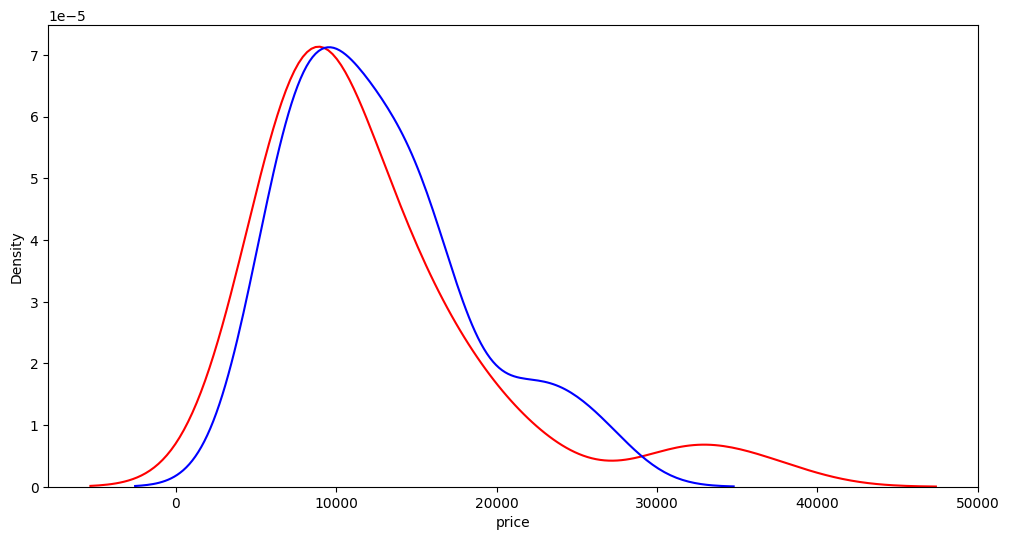

In [38]:
plt.figure(figsize=(12,6))
ax1=sns.distplot(y_test,hist=False, color='r', label='Actual value')
sns.distplot(y_hat_simple,hist=False, color='b', label= "Fitted value", ax=ax1)
plt.show()

In [39]:
mse=SS_R/y_hat_simple.shape[0]

In [40]:
mse

22790582.309292633

In [41]:
rmse=mse**1/2
rmse

11395291.154646317

In [42]:
mean_squared_error(y_test,y_hat_simple)

22790582.309292633